<a href="https://colab.research.google.com/github/Mrjackee11/creditcard_ML-model/blob/main/Creditcard_fraud_detection_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
cdt_data=pd.read_csv('creditcard.csv')

In [18]:
cdt_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [19]:
cdt_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65448,51589,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,...,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,0.76,0.0
65449,51589,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,...,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,42.90,0.0
65450,51590,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,...,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,1.98,0.0
65451,51591,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,...,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,113.65,0.0
65452,51591,1.251499,0.352835,-0.173985,1.057454,0.345146,-0.366959,0.446715,-0.292922,-0.083856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
cdt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

In [21]:
#null val check
cdt_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [22]:
#check abt legit &fradulent
cdt_data['Class'].value_counts()

,count
Class,
0.0,65283
1.0,169


In [23]:
legit=cdt_data[cdt_data.Class==0]
fradulent=cdt_data[cdt_data.Class==1]

In [24]:
print(legit.shape)
print(fradulent.shape)

(65283, 31)
(169, 31)


o---->normal legit
1---->fradulent


In [25]:
legit.Amount.describe()

,Amount
count,65283.000000
mean,96.279722
std,270.360076
min,0.000000
25%,7.680000
50%,26.250000
75%,88.000000
max,19656.530000


In [26]:
fradulent.Amount.describe()

,Amount
count,169.000000
mean,94.895680
std,220.959331
min,0.000000
25%,1.000000
50%,7.610000
75%,99.990000
max,1809.680000


In [27]:
cdt_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,33439.759478,-0.222825,-0.026270,0.710616,0.157998,-0.253909,0.109118,-0.094275,0.050530,0.045833,...,0.047148,-0.030787,-0.106567,-0.038539,0.005807,0.136450,0.019730,0.000695,0.004147,96.279722
1.0,29493.242604,-7.106029,5.115846,-9.566072,5.470948,-5.263861,-2.172211,-7.412550,3.501007,-3.298551,...,0.431494,0.850670,-0.212903,-0.255225,-0.075295,0.245601,0.107931,0.576249,0.041284,94.895680


undersampling

bulit a sample dataset

*   List item
*   List item


normal ---->169

In [33]:
legit_sample=legit.sample(n=169)

In [34]:
new_dtset=pd.concat([legit_sample,fradulent],axis=0)

In [35]:
new_dtset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22812,32444,1.240476,-0.620118,-0.467062,-0.771076,-0.081169,0.415127,-0.519283,0.102920,-0.920426,...,-0.024870,-0.179017,-0.212832,-1.200673,0.524795,-0.226549,0.023559,0.027074,86.90,0.0
28346,34966,0.142802,0.525848,1.327447,1.659649,0.282260,1.115155,0.321620,0.159175,-0.174764,...,0.206974,1.135008,0.083822,-0.239514,-1.265611,-0.247293,0.185558,0.020510,23.88,0.0
49662,44154,1.096475,-0.869352,0.717231,-1.261922,-1.502043,-0.934531,-0.581767,-0.053936,2.095161,...,0.166180,0.520217,-0.185147,0.445474,0.457004,0.006556,0.032327,0.038974,94.87,0.0
16390,27768,-1.262125,1.148266,1.699716,1.810567,-1.083102,0.597099,-0.603268,1.090712,0.102411,...,-0.165533,-0.260831,0.106860,0.430071,-0.370511,-0.470483,-0.131393,0.014240,21.00,0.0
19976,30692,0.995827,-0.259644,-0.195584,1.095488,0.322418,0.838399,0.043620,0.211907,0.186541,...,-0.068403,-0.263437,-0.306689,-1.138873,0.729862,-0.267354,0.010399,0.011504,116.00,0.0


In [31]:
new_dtset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
63421,50706,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1.0
63634,50808,-9.169790,7.092197,-12.354037,4.243069,-7.176438,-3.386618,-8.058012,6.442909,-2.412987,...,0.926157,-0.817706,-0.150434,-0.039383,0.485640,-0.264325,1.159690,0.232758,99.99,1.0
64329,51112,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,...,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,99.99,1.0
64411,51135,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,-2.362097,...,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,99.99,1.0
64460,51155,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,...,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,99.99,1.0


In [36]:
new_dtset['Class'].value_counts()

,count
Class,
0.0,169
1.0,169


In [37]:
new_dtset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,33807.810651,-0.326829,-0.168381,0.622306,-0.054251,-0.320354,-0.006389,-0.107487,0.030682,0.085673,...,0.005266,-0.00918,-0.138688,-0.098532,0.046012,0.125779,0.028685,0.090847,-0.045207,99.835089
1.0,29493.242604,-7.106029,5.115846,-9.566072,5.470948,-5.263861,-2.172211,-7.412550,3.501007,-3.298551,...,0.431494,0.85067,-0.212903,-0.255225,-0.075295,0.245601,0.107931,0.576249,0.041284,94.895680


split the data into feature and tragets

In [38]:
x=new_dtset.drop(columns='Class',axis=1)
y=new_dtset['Class']

In [39]:
print(x)

        Time         V1        V2         V3        V4        V5        V6  \
22812  32444   1.240476 -0.620118  -0.467062 -0.771076 -0.081169  0.415127   
28346  34966   0.142802  0.525848   1.327447  1.659649  0.282260  1.115155   
49662  44154   1.096475 -0.869352   0.717231 -1.261922 -1.502043 -0.934531   
16390  27768  -1.262125  1.148266   1.699716  1.810567 -1.083102  0.597099   
19976  30692   0.995827 -0.259644  -0.195584  1.095488  0.322418  0.838399   
...      ...        ...       ...        ...       ...       ...       ...   
63421  50706  -8.461845  6.866198 -11.838269  4.194211 -6.923097 -3.221147   
63634  50808  -9.169790  7.092197 -12.354037  4.243069 -7.176438 -3.386618   
64329  51112  -9.848776  7.365546 -12.898538  4.273323 -7.611991 -3.427045   
64411  51135 -10.527304  7.639745 -13.443115  4.303403 -8.048210 -3.466997   
64460  51155 -11.205461  7.914633 -13.987752  4.333341 -8.484970 -3.506561   

             V7        V8        V9  ...       V20       V21   

In [40]:
print(y)

22812    0.0
28346    0.0
49662    0.0
16390    0.0
19976    0.0
        ... 
63421    1.0
63634    1.0
64329    1.0
64411    1.0
64460    1.0
Name: Class, Length: 338, dtype: float64


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [42]:
print(x.shape,x_train.shape,x_test.shape)

(338, 30) (270, 30) (68, 30)


In [43]:
print(y.shape,y_train.shape,y_test.shape)

(338,) (270,) (68,)


In [46]:
model=LogisticRegression()

logistic regression


In [47]:
model= LogisticRegression(max_iter=300000)

In [48]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=300000)

model evaluation


In [49]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [50]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 0.9703703703703703


In [51]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [52]:
print('accuracy on test data:',test_data_accuracy)

accuracy on test data: 0.9558823529411765


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


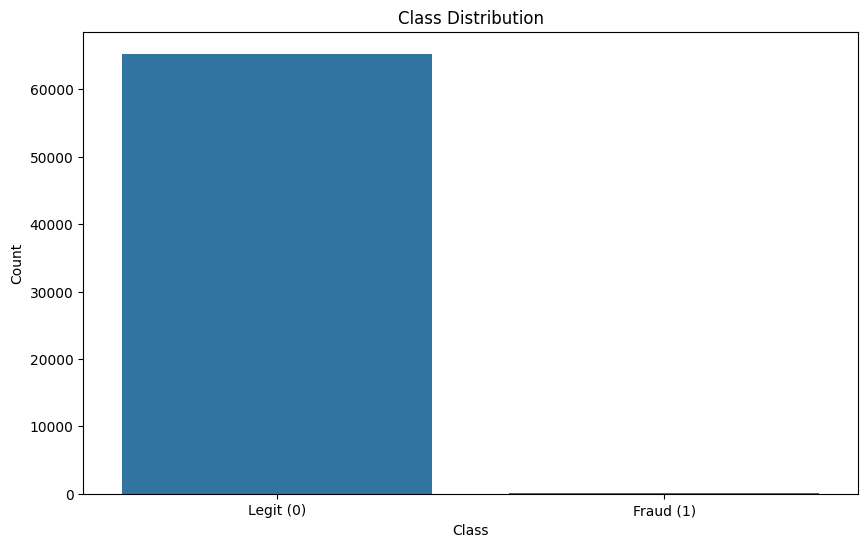

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x='Class',data=cdt_data)
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3157688088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=cdt_data, palette=['green', 'red'])


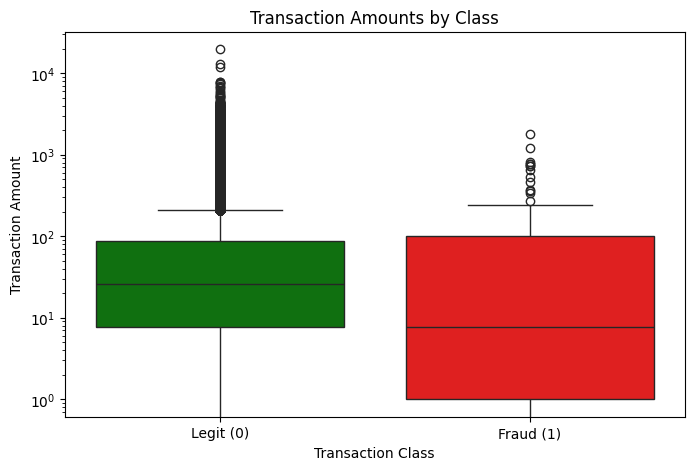

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=cdt_data, palette=['green', 'red'])
plt.title('Transaction Amounts by Class')
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.xlabel('Transaction Class')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

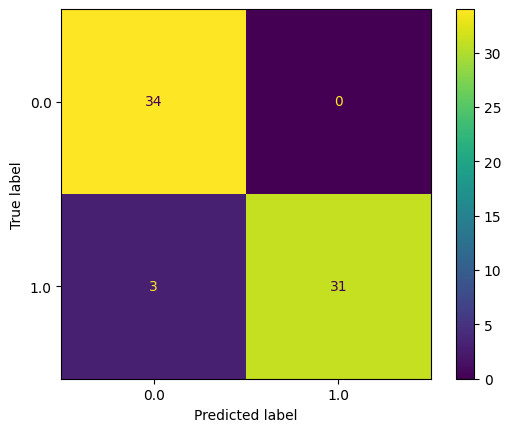

In [62]:
cm=confusion_matrix(y_test,x_test_prediction)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [64]:
from sklearn.manifold import TSNE

/tmp/ipython-input-3555456934.py:8: UserWarning: Legend does not support handles for DataFrame instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([legit],[fradulent])


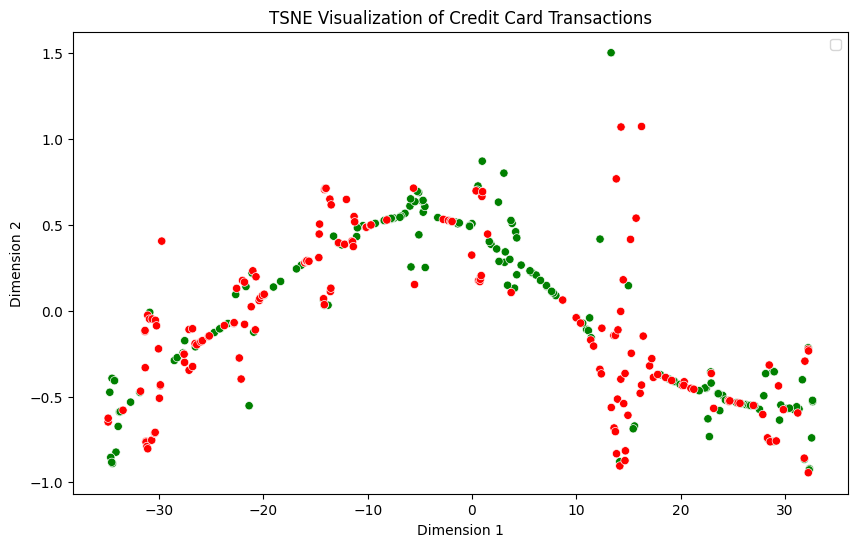

In [65]:
TSNE=TSNE(n_components=2,random_state=42)
x_emmbeding=TSNE.fit_transform(x)
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_emmbeding[:,0],y=x_emmbeding[:,1],hue=y,palette=['green','red'])
plt.title('TSNE Visualization of Credit Card Transactions')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend([legit],[fradulent])
plt.show()